# FINAL PROJECT - NOTEBOOK

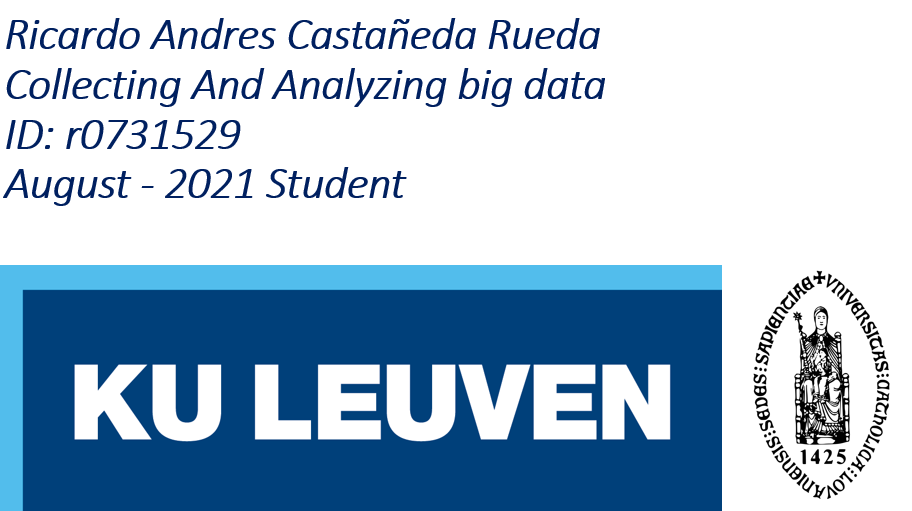

## INTRODUCTION 

This notebook pretends to apply some of the most relevant methodologies illustrated during the five lectures to a new dataset and provide conclusions about it. The goal is to analyze a Wikipedia web page, extract informative features, convert this information into a dataset, and perform numerical operations that provide conclusions or predictions. Furthermore, this project intends to show data manipulation aspects such as: Creating a new variable or column, creating functions to modify a variable, filtering or classifying a variable according to its value, providing graphs with relevant information, and obtaining a summary or description of the data. In conclusion, the current notebook applies different methodologies to extract and analyze mainly the text from a website, and show how to obtain numerical information from strings.  

***
>The `Wikipedia` page to consider corresponds to the `list of different cities around Colombia`. The purpose is to obtain relevant information regarding the features of text related to each city description and construct graphical and numerical representations about them. For instance, some features in the text may include the length of the text, the number of letters in the name of the cities, the list of words that are significantly used in the text, and graphs of these results. 
***

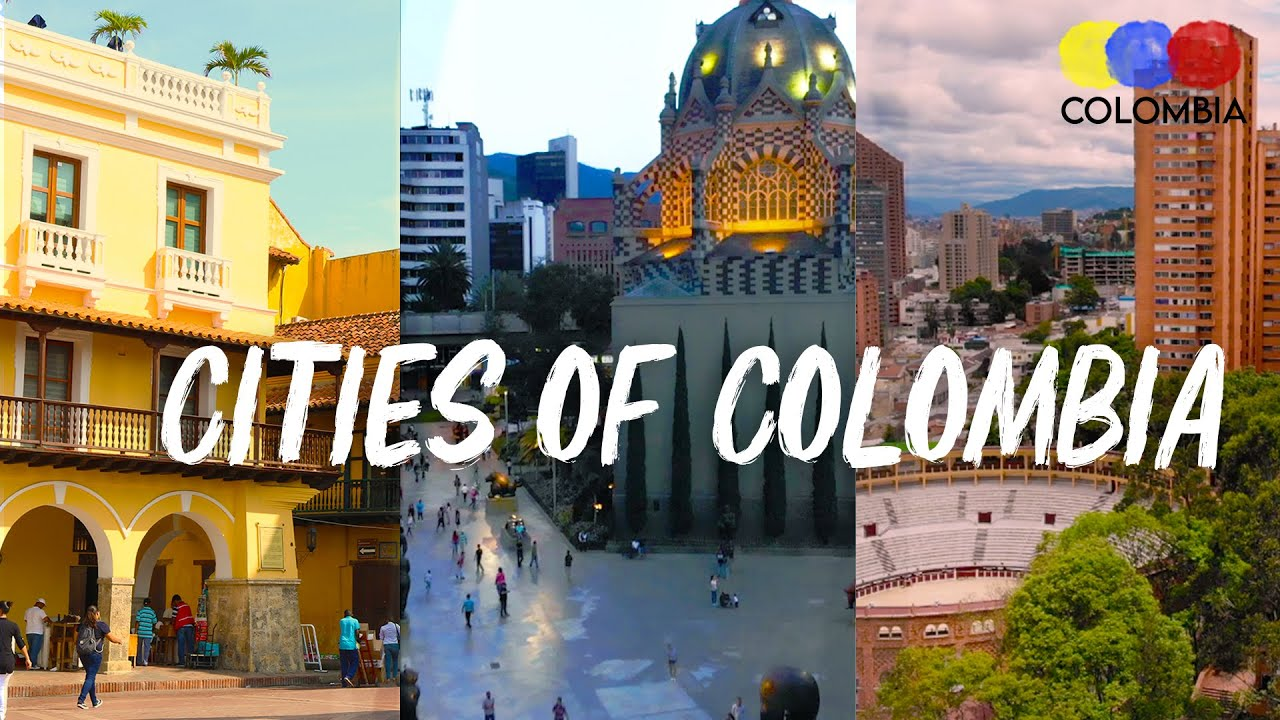

#### List of `Packages` to import

In [172]:
from requests_html import HTMLSession
import pandas as pd
import requests
from pdtext.tf import word_count
import seaborn as sns
from pdtext.tf import make_wf_df
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

## Steps to follow

##### Step 1 - Converting URL into a Variable 

In [17]:
session = HTMLSession()
url = 'https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colombia'
r = session.get(url)
html = r.html
r.status_code

200

First, we select a `URL` and use the `session.get` command to access the link information. Following this, the `Status_code` command indicates whether the link is accessible and works correctly, and in this case, the code is `200`, and thereby, we can inspect the website without any problem. Moreover, the page content is shown below as a data frame to have an overview of the important topics.  

In [18]:
text =[]    # An empty string
for item in html.find('.mw-headline'): 
    text.append(item.text)
    
text = pd.DataFrame(text)
text

,0
0,List
1,See also
2,References
3,External links


Now we see that the list of cities is the most relevant aspect to inspect on this website. Therefore, the goal is to construct a matrix that shows  <i><b>the city name, the URL to access its information, and the text </b> </i> related to each city to further analyze these aspects.

##### Step 2 - Listing the cities 

### <font color='orange'> DATASET WITH THE LIST OF CITIES </font> 

***
 <i> <b>First, we create a function to scrape or obtain the text from a specific URL.</b></i> 
***

In [19]:
def page_text(url):
 # URL as variable
    r = session.get(url) 
    html = r.html
 #List of elements and empty string
    paragraphs = html.find('p')
    article_text = ' '
 # Finding element text 
    for a in paragraphs:
        new_text = a.text
        article_text = article_text + new_text

    return article_text


***
 <i> <b>Second, we inspect in the website the name of the variable that contains the list of cities we wish to check, and in this case, the word `"tbody"` combined with the commands `.find` and `.links` show the names individually.</b></i> 
***

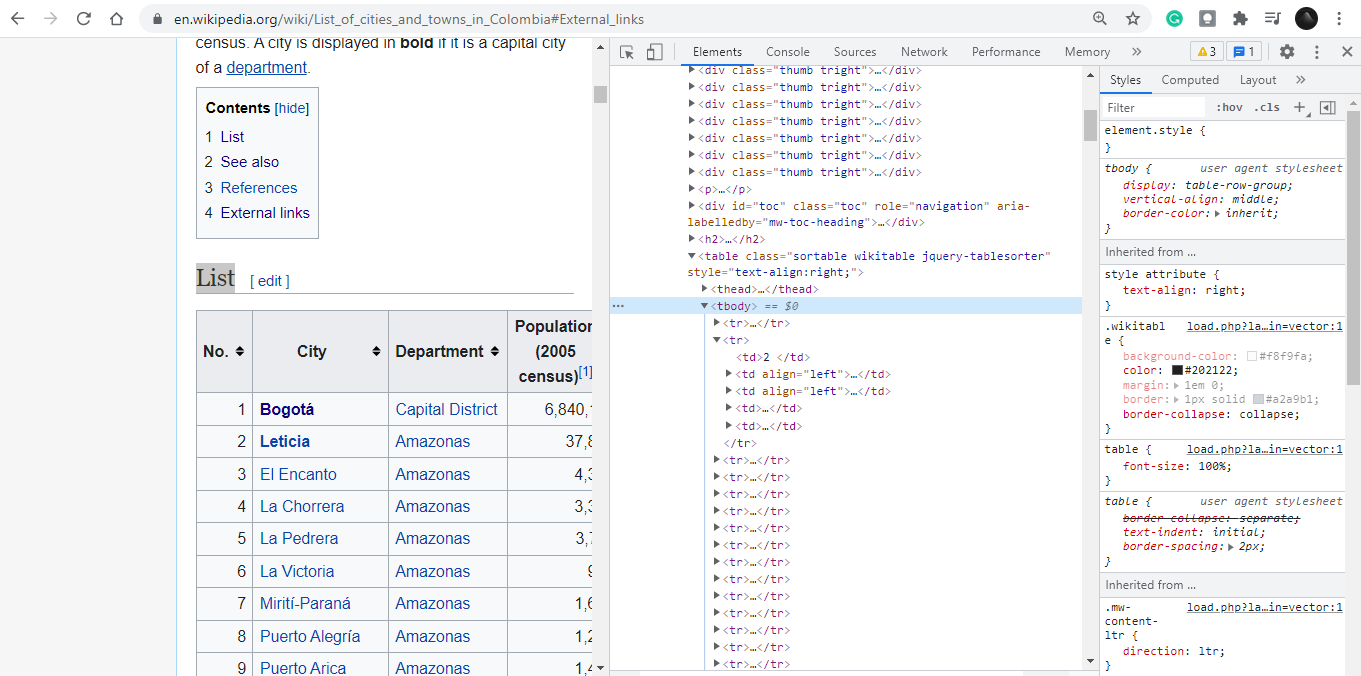

***
 <i> <b>To make sure these commands will provide the name of the cities, we try the `tbody` class to see if it works before using the created function, and after that we use a for loop to store each name as list</b></i> 
***

In [124]:
b=html.find("tbody")[0].links
b


{'/wiki/Ap%C3%ADa',
 '/wiki/Vegach%C3%AD',
 '/wiki/Antioquia_Department',
 '/wiki/El_Tarra',
 '/wiki/Medio_San_Juan',
 '/wiki/Land%C3%A1zuri',
 '/wiki/Restrepo,_Meta',
 '/wiki/Pensilvania',
 '/wiki/Ovejas',
 '/wiki/Trujillo,_Valle_del_Cauca',
 '/wiki/Armenia,_Antioquia',
 '/wiki/Neira,_Caldas',
 '/wiki/C%C3%B3rdoba,_Bol%C3%ADvar',
 '/wiki/Mercaderes,_Cauca',
 '/wiki/Caparrap%C3%AD',
 '/wiki/Girardota',
 '/wiki/San_Alberto,_Cesar',
 '/wiki/R%C3%ADo_Quito',
 '/wiki/Santa_Mar%C3%ADa,_Boyac%C3%A1',
 '/wiki/Anolaima',
 '/wiki/El_Retorno',
 '/wiki/Urumita',
 '/wiki/Tipacoque',
 '/wiki/Machet%C3%A1',
 '/wiki/Chiriguan%C3%A1',
 '/wiki/Acac%C3%ADas',
 '/wiki/La_Tebaida',
 '/wiki/Anzo%C3%A1tegui,_Tolima',
 '/w/index.php?title=Mapiripana,_Guain%C3%ADa&action=edit&redlink=1',
 '/wiki/Vijes',
 '/wiki/Santiago,_Norte_de_Santander',
 '/wiki/Dabeiba',
 '/wiki/Chipat%C3%A1,_Santander',
 '/wiki/Bojac%C3%A1',
 '/wiki/Jenesano',
 '/wiki/Puerto_Parra',
 '/wiki/Pasto_(Colombia)',
 '/wiki/Casabianca,_Tolima'

In [13]:
links = []

b=html.find("tbody")[0].links

for item in b:
    city = item.replace('/wiki/','')
    links.append(city)

In [21]:
links

['Ap%C3%ADa',
 'Vegach%C3%AD',
 'Antioquia_Department',
 'El_Tarra',
 'Medio_San_Juan',
 'Land%C3%A1zuri',
 'Restrepo,_Meta',
 'Pensilvania',
 'Ovejas',
 'Trujillo,_Valle_del_Cauca',
 'Armenia,_Antioquia',
 'Neira,_Caldas',
 'C%C3%B3rdoba,_Bol%C3%ADvar',
 'Mercaderes,_Cauca',
 'Caparrap%C3%AD',
 'Girardota',
 'San_Alberto,_Cesar',
 'R%C3%ADo_Quito',
 'Santa_Mar%C3%ADa,_Boyac%C3%A1',
 'Anolaima',
 'El_Retorno',
 'Urumita',
 'Tipacoque',
 'Machet%C3%A1',
 'Chiriguan%C3%A1',
 'Acac%C3%ADas',
 'La_Tebaida',
 'Anzo%C3%A1tegui,_Tolima',
 '/w/index.php?title=Mapiripana,_Guain%C3%ADa&action=edit&redlink=1',
 'Vijes',
 'Santiago,_Norte_de_Santander',
 'Dabeiba',
 'Chipat%C3%A1,_Santander',
 'Bojac%C3%A1',
 'Jenesano',
 'Puerto_Parra',
 'Pasto_(Colombia)',
 'Casabianca,_Tolima',
 'Ortega,_Tolima',
 'Hobo,_Huila',
 'San_Juan_Nepomuceno,_Bol%C3%ADvar',
 'Dolores,_Tolima',
 'Providencia,_Nari%C3%B1o',
 'Granada,_Antioquia',
 'Yal%C3%AD',
 'Almeida,_Boyac%C3%A1',
 'La_Esperanza,_Norte_de_Santander',

***
 <i> <b>Finally, we use the name of the city we obtained before to get the full URL of each location and the text corresponding to it. This way, we create a dataset with some basic information about the cities.</b></i> 
***

In [22]:
wikis = []

for page in links:
    url = 'https://en.wikipedia.org/wiki/' + page
    text = page_text(url)
    
    w = {'city name' : requests.utils.unquote(page),
         'url' : url,
         'text' : text}
    
    wikis.append(w)

In [23]:
df = pd.DataFrame(wikis)
df.sample(10)

,city name,url,text
32,"Chipatá,_Santander","https://en.wikipedia.org/wiki/Chipat%C3%A1,_Sa...",Chipatá is a town and municipality in the Vél...
1087,Úmbita,https://en.wikipedia.org/wiki/%C3%9Ambita,Úmbita is a town and municipality in the Márq...
287,López_de_Micay,https://en.wikipedia.org/wiki/L%C3%B3pez_de_Micay,López de Micay (Spanish pronunciation: [ˈlope...
760,"Silvia,_Cauca","https://en.wikipedia.org/wiki/Silvia,_Cauca",Silvia is a town and municipality in the Cauc...
590,Nunchía,https://en.wikipedia.org/wiki/Nunch%C3%ADa,Nunchía is a town and municipality in the Dep...
331,"Galán,_Santander","https://en.wikipedia.org/wiki/Gal%C3%A1n,_Sant...",Galán is a town and municipality in the Santa...
855,"San_Carlos,_Córdoba","https://en.wikipedia.org/wiki/San_Carlos,_C%C3...",San Carlos is a town and municipality located...
972,"Salamina,_Magdalena","https://en.wikipedia.org/wiki/Salamina,_Magdalena",Salamina is a town and municipality in the De...
313,Paime,https://en.wikipedia.org/wiki/Paime,Paime is a municipality and town of Colombia ...
505,Versalles,https://en.wikipedia.org/wiki/Versalles,Versalles is a town and municipality located ...


##### Step 3 - Creating Numerical Variables 

Some basic information from the dataset `df`

In [24]:
rows= len(df)
info= df.info()

info
print("#========#")
print(rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city name  1152 non-null   object
 1   url        1152 non-null   object
 2   text       1152 non-null   object
dtypes: object(3)
memory usage: 27.1+ KB
#========#
1152


***
 <i> <b>Now, the objective is to create numerical variables from the previous dataset, which only contains texts. Firstly, the number of words in the text variable for each city is calculated, and for this end, two methods are used; At first a `For loop` can be tried, but the second option is the command `word_count`. Secondly, we calculate the number of letters that the name of the cities has, and we use a`For loop` too. Finally, two categorical variables are created which are `group` and `Text_size` by creating a `function`. The former classifies the name of the city as large, small, or medium, and the latter classifies the length of the text as trivial or substantial or in other words whether the text is small or large.</b></i> 
***

In [27]:
# An empty array to store data 
word_text = []

for a in df['text']:
    # This function splits the text as words
    words= a.split()
    length = len(words)
    # It saves each iteration in a space of the empty array
    word_text.append(length)

In [28]:
city_letters = []

for a in df['city name']:
    # This time we calculate te number of letters in the word
    length = len(a)
    city_letters.append(length)

In [ ]:
# Creating a column with the text length using For loop (method 1)
df['word_text']=word_text

# Creating a column with the names length using For loop
df['city_letters']=city_letters

In [128]:
# Function to cluster the cties' name
n = df['city_letters'].head(5)
def w_size(let): 
   
    # Conditional to classify the word
    for a in range(let):
        if a < 10:
            j = "Small"
        elif a < 17:
            j = "Medium"
        elif a >17:
            j = "large"
        group = j
    return group

# Testing Function

n['r']=n.apply(w_size)
n

0                                                    4
1                                                    7
2                                                   20
3                                                    8
4                                                   14
r    0     Small
1     Small
2     large
3     Smal...
Name: city_letters, dtype: object

***
 <i> <b>Now, the objective is to create numerical variables from the previous dataset, which only contains texts. Firstly, the number of words in the text variable for each city is calculated, and for this end, two methods are used; At first a `For loop` can be tried, but the second option is the command `word_count`. Secondly, we calculate the number of letters that the name of the cities has, and we use a`For loop` too. Finally, two categorical variables are created which are `group` and `Text_size` by creating a `function`. The former classifies the name of the city as large, small, or medium, and the latter classifies the length of the text as trivial or substantial or in other words whether the text is small or large.</b></i> 
***

In [129]:
# Creating a column with the text length using a function (method 2)
df['Word_text.func'] = df['text'].apply(word_count)

# Creating a column clustering the names using a created function 
df['group']=df['city_letters'].apply(w_size)

In [68]:
# Function to cluster the texts length

n = df['Word_text.func'].head(5)
def Text_size(let): 
   
    # Conditional to classify the word
    for a in range(let):
        if a < 263:
            j = "Trivial"
        elif a >263:
            j = "Substantial"
        group = j
    return group

# Testing Function

n['r']=n.apply(Text_size)
n

0                                                  385
1                                                   37
2                                                 1865
3                                                   46
4                                                   42
r    0    Substantial
1        Trivial
2    Substan...
Name: Word_text.func, dtype: object

In [130]:
# Creating a column clustering the texts length using a created function 
df['Text_size'] = df['Word_text.func'].apply(Text_size)

### <font color='gray'> DATASET WITH NUMERICAL VARIABLES </font> 

In [132]:
df

,city name,url,text,word_text,city_letters,Word_text.func,group,Text_size
0,Apía,https://en.wikipedia.org/wiki/Ap%C3%ADa,"Coordinates:\n.mw-parser-output .geo-default,...",387,4,385,Small,Substantial
1,Vegachí,https://en.wikipedia.org/wiki/Vegach%C3%AD,Vegachí (Spanish pronunciation: [beɣaˈtʃi]) i...,37,7,37,Small,Trivial
2,Antioquia_Department,https://en.wikipedia.org/wiki/Antioquia_Depart...,The Department of Antioquia (Spanish pronunci...,1865,20,1865,large,Substantial
3,El_Tarra,https://en.wikipedia.org/wiki/El_Tarra,El Tarra is a Colombian municipality and town...,48,8,46,Small,Trivial
4,Medio_San_Juan,https://en.wikipedia.org/wiki/Medio_San_Juan,Medio San Juan is a municipality and town in ...,44,14,42,Medium,Trivial
...,...,...,...,...,...,...,...,...
1147,El_Piñón,https://en.wikipedia.org/wiki/El_Pi%C3%B1%C3%B3n,El Piñón is a town and municipality of the Co...,118,8,116,Small,Trivial
1148,Ataco,https://en.wikipedia.org/wiki/Ataco,Ataco is a town and municipality located in t...,65,5,63,Small,Trivial
1149,Sabanas_de_San_Ángel,https://en.wikipedia.org/wiki/Sabanas_de_San_%...,Sabanas de San Ángel (Spanish pronunciation: ...,113,20,111,large,Trivial
1150,"Palestina,_Caldas","https://en.wikipedia.org/wiki/Palestina,_Caldas",Palestina is a town in the south central regi...,161,17,159,Medium,Trivial


***
 <i> <b> A quick look at the first 20 cities with the largest text or description </b></i> 
***

In [142]:
df2 = df.sort_values(by='word_text', ascending=False)
df2.head(20)

,city name,url,text,word_text,city_letters,Word_text.func,group,Text_size
254,Barranquilla,https://en.wikipedia.org/wiki/Barranquilla,Barranquilla (American Spanish: [baraŋˈkiʝa] ...,13385,12,13380,Medium,Substantial
1130,Capital_District_(Colombia),https://en.wikipedia.org/wiki/Capital_District...,"Bogotá (/ˌboʊɡəˈtɑː/,[13][14] also UK: /ˌbɒɡ-...",11559,27,11552,large,Substantial
741,Bogotá,https://en.wikipedia.org/wiki/Bogot%C3%A1,"Bogotá (/ˌboʊɡəˈtɑː/,[13][14] also UK: /ˌbɒɡ-...",11559,6,11552,Small,Substantial
773,Medellín,https://en.wikipedia.org/wiki/Medell%C3%ADn,Medellín (Spanish pronunciation: [meðeˈʝin] o...,9428,8,9426,Small,Substantial
797,Valencia,https://en.wikipedia.org/wiki/Valencia,"Valencia (Spanish: [baˈlenθja]), officially V...",7579,8,7578,Small,Substantial
782,Cali,https://en.wikipedia.org/wiki/Cali,Santiago de Cali (Spanish pronunciation: [san...,5743,4,5742,Small,Substantial
871,Cartagena_de_Indias,https://en.wikipedia.org/wiki/Cartagena_de_Indias,"Cartagena (/ˌkɑːrtəˈdʒiːnə/ KAR-tə-JEE-nə, al...",4862,19,4862,large,Substantial
973,"Pereira,_Colombia","https://en.wikipedia.org/wiki/Pereira,_Colombia",Pereira (Spanish pronunciation: [peˈɾejɾa]) i...,4006,17,4006,Medium,Substantial
355,Cúcuta,https://en.wikipedia.org/wiki/C%C3%BAcuta,"Cúcuta (Spanish: ['kukuta] (listen)), officia...",4004,6,4004,Small,Substantial
194,Valledupar,https://en.wikipedia.org/wiki/Valledupar,Valledupar (Spanish pronunciation: [baʝeðuˈpa...,3810,10,3810,Small,Substantial


***
 <i> <b> A quick look at the first 20 cities with the largest number of letters in the name </b></i> 
***

In [144]:
df2 = df.sort_values(by='city_letters', ascending=False)
df2.head(20)

,city name,url,text,word_text,city_letters,Word_text.func,group,Text_size
433,"/w/index.php?title=Providencia,_San_Andrés_y_P...",https://en.wikipedia.org/wiki//w/index.php?tit...,Other reasons this message may be displayed:,7,78,7,large,Trivial
28,"/w/index.php?title=Mapiripana,_Guainía&action=...",https://en.wikipedia.org/wiki//w/index.php?tit...,Other reasons this message may be displayed:,7,60,7,large,Trivial
399,"/w/index.php?title=Suaita,_Santander&action=ed...",https://en.wikipedia.org/wiki//w/index.php?tit...,Other reasons this message may be displayed:,7,58,7,large,Trivial
932,"Archipelago_of_San_Andrés,_Providencia_and_San...",https://en.wikipedia.org/wiki/Archipelago_of_S...,"The Archipelago of San Andrés, Providencia an...",1891,57,1883,large,Substantial
698,"/w/index.php?title=Agrado,_Huila&action=edit&r...",https://en.wikipedia.org/wiki//w/index.php?tit...,Other reasons this message may be displayed:,7,54,7,large,Trivial
578,"Villa_del_Rosario,_Norte_de_Santander",https://en.wikipedia.org/wiki/Villa_del_Rosari...,Villa del Rosario is a Colombian municipality...,240,37,238,large,Trivial
1140,"Puerto_Santander,_Norte_de_Santander",https://en.wikipedia.org/wiki/Puerto_Santander...,Puerto Santander is a town and smallest munic...,80,36,78,large,Trivial
809,"San_Andrés,_San_Andrés_y_Providencia","https://en.wikipedia.org/wiki/San_Andr%C3%A9s,...",San Andrés (Spanish pronunciation: [ˌsan anˈd...,144,36,144,large,Trivial
46,"La_Esperanza,_Norte_de_Santander","https://en.wikipedia.org/wiki/La_Esperanza,_No...",La Esperanza (Spanish pronunciation: [la espe...,51,32,49,large,Trivial
365,"San_Cayetano,_Norte_de_Santander","https://en.wikipedia.org/wiki/San_Cayetano,_No...",San Cayetano is a municipality and town in th...,58,32,56,large,Trivial


It can be seen, that counting the words with the For loop usually shows two words more than when using the function. However, as the difference is not quite significant, we will ignore the difference and analyze the data with any of the two variables. 

##### Step 4 - Data Analyzis 

### <font color='aquamarin'> DATA EXPLORATION </font> 

***
 <i> <b>Overall, the texts descriptions have an average of 263 words. The largest text contains 13380 words, and the smallest has only 7 words. It can be seen that having a text with seven words may not be correct, and then this superficial analysis gives us a sign of the first mistake we can catch by doing a data exploration. Therefore, we will inspect the website corresponding to a text with seven words to check the findings. </b></i> 
***

In [148]:
df['Word_text.func'].describe()

count     1152.000000
mean       263.940104
std        831.122189
min          7.000000
25%         42.000000
50%         66.000000
75%        215.000000
max      13380.000000
Name: Word_text.func, dtype: float64

The histogram depicts that most of the texts have less than 1000 words

<AxesSubplot:>

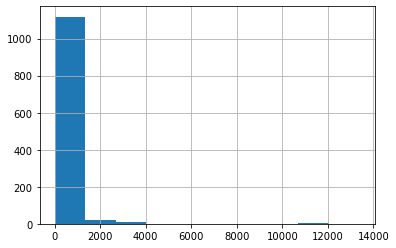

In [77]:
df['Word_text.func'].hist()

***
> <i> Indeed, we detect that we scraped some additional words besides the cities and that is why we have such small descriptions. Note that because the purpose of this analysis is to explore text, having this kind of anomaly is not an issue but a source of extra information. </i> 
 
***

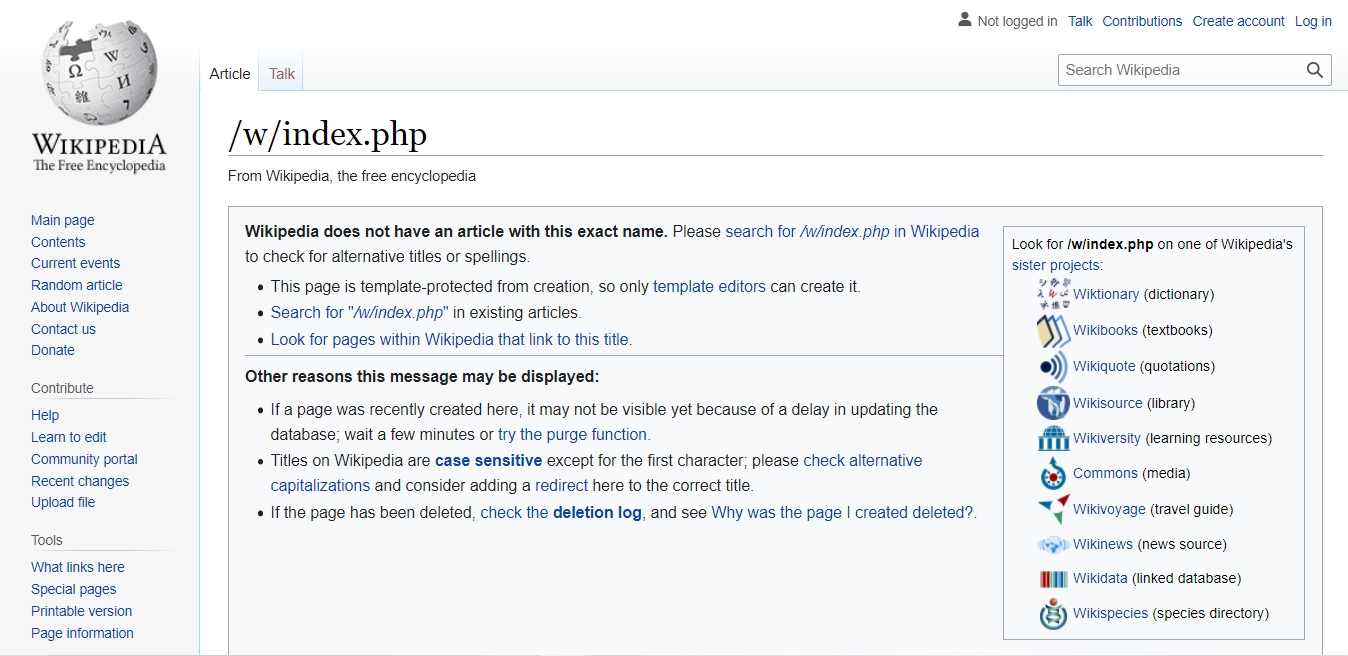

***
> <i> The average number of letters in the titles or city names is 13. Then it seems that an average city has a short name. </i> 
 
***

In [151]:
df['city_letters'].describe()

count    1152.000000
mean       13.657118
std         6.844529
min         3.000000
25%         8.000000
50%        14.000000
75%        18.000000
max        78.000000
Name: city_letters, dtype: float64

***
> <i> Most of the cities have a short name as mentioned above </i> 
 
***

<AxesSubplot:>

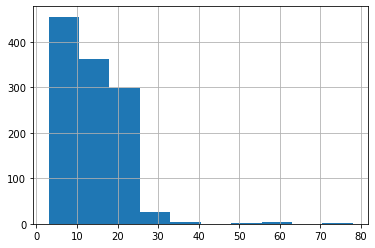

In [81]:
df['city_letters'].hist()

### <font color='GREEN'> BOXPLOTS </font> 

***
> <b><i> The Boxplots show the median value of a variable in respect to a  class or category, and also the unusual observations or outliers, and thereby, the classes that we constructed before will be analyzed regarding the text and the city length as shown below.</i> </b>
 
***

##### Based on the text length 

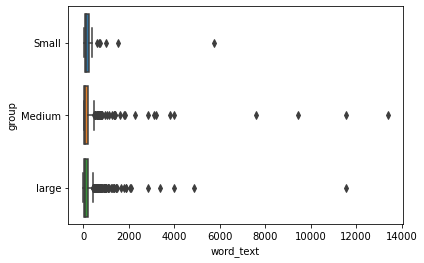

In [82]:

sns.boxplot(y = "group", 
            x = "word_text",
            data =df);

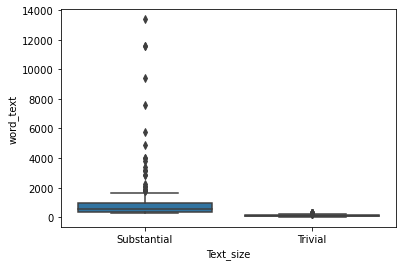

In [155]:
sns.boxplot(x = "Text_size", 
            y = "word_text",
            data =df);

##### Based on the name length 

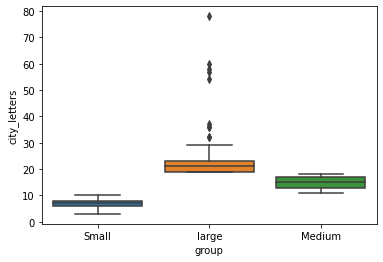

In [159]:
sns.boxplot(x = "group", 
            y = "city_letters",
            data =df);

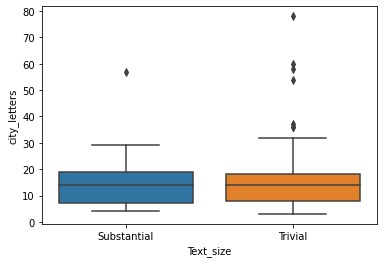

In [158]:
sns.boxplot(x = "Text_size", 
            y = "city_letters",
            data =df);

### <font color='oRANGE'> WORD FREQUENCY </font> 

***
> <i> In this part of the analysis, we can also observe the words contained in the texts of each city and detect the most used words, create frequency tables, and even perform a logistic regression model based on one of the classes to acquire extra details.</i> 
 
***

In [83]:
wf1 = df['text']
wf1

0        Coordinates:\n.mw-parser-output .geo-default,...
1        Vegachí (Spanish pronunciation: [beɣaˈtʃi]) i...
2        The Department of Antioquia (Spanish pronunci...
3        El Tarra is a Colombian municipality and town...
4        Medio San Juan is a municipality and town in ...
                              ...                        
1147     El Piñón is a town and municipality of the Co...
1148     Ataco is a town and municipality located in t...
1149     Sabanas de San Ángel (Spanish pronunciation: ...
1150     Palestina is a town in the south central regi...
1151     Cereté is a town and municipality located in ...
Name: text, Length: 1152, dtype: object

***
<i> This is the list with the 50 most used words in all texts.</i> 
***

In [85]:
wf0 = make_wf_df(wf1)
wf = make_wf_df(wf1, summary = True)    
wf.head(50)  
       

the             28440
of              15773
and             10174
in               8878
is               6025
a                5951
to               4663
output           4270
mw               4268
parser           4267
by               3384
geo              3031
was              2769
department       2758
it               2503
municipality     2180
de               2055
with             2006
as               1821
on               1799
colombia         1785
town             1755
city             1687
from             1683
n                1644
w                1611
for              1391
are              1307
has              1255
display          1217
1                1208
its              1128
that             1082
spanish          1035
la               1020
which            1004
located           952
an                943
can               919
location          887
this              883
at                870
area              866
s                 847
you               819
help      

***
<i><b>Based on this list, we can create a frequency table that shows the number of times a word shows up in the text of a city.</b></i> 
***

In [86]:
len(wf0.keys())

20685

In [87]:
wf0.head()

,0,00,000,000239,000mm,000this,001,00194,00389,00389this,...,ˌbɒɡ,ˌkɑːrtəˈdʒiːnə,ˌsan,ˌsanta,αντιοχεία,βanaˈneɾa,βawˈðo,βaˈlenθja,βiɾˈxinja,ℝdabeiba
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***
<i>As expected, `the` is the most common word in all cities' text. Nevertheless, words like `Spanish` also show a repetitive pattern especially in some of the cities. To see the city in which the text uses this word the most, we can use a `ford loop`, and for this example, the loop will show the first five cities as shown below.</i> 
***

In [88]:
showme = ['colombia', 'town',  'fruit', 'sea', 'location', 'spanish','the']
wf0[showme].sample(20)

,colombia,town,fruit,sea,location,spanish,the
1033,1,3,0,1,0,10,92
999,2,1,0,0,0,1,58
118,1,1,0,0,1,0,2
465,1,1,0,0,1,0,1
748,1,1,0,0,1,0,1
253,6,2,0,0,0,2,43
498,1,1,0,2,2,1,126
144,1,1,0,0,1,1,18
227,0,1,0,0,1,0,1
534,1,1,0,0,1,0,1


###### Finding the first five cities

In [214]:
n = [1033,999,118,465,748]
for a in n:  
    b=df['city name'].loc[[a]]
    print(b)


1033    Muzo
Name: city name, dtype: object
999    San_Luis,_Antioquia
Name: city name, dtype: object
118    Belén_de_Umbría
Name: city name, dtype: object
465    El_Cairo
Name: city name, dtype: object
748    San_José_de_Miranda
Name: city name, dtype: object


### <font color='BLUE'> TEXT CLASSIFICATION </font> 

***
<i> Finally, we can use a logistic regression model to classify the words in the text.</i> 
***

######  Converting Text Into a Fixed-length Vector

In [218]:
vectorizer = CountVectorizer(lowercase   = True,
                            ngram_range = (1,1),
                             min_df      = .01,
                             max_df     = .8,
                             max_features = None)       

In [219]:
vectorizer.fit(df['text'])


CountVectorizer(max_df=0.8, min_df=0.01)

In [220]:
len(vectorizer.get_feature_names())

1996

In [221]:
vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '017',
 '02',
 '03',
 '04',
 '05',
 '050',
 '06',
 '067',
 '07',
 '08',
 '083',
 '09',
 '10',
 '100',
 '11',
 '117',
 '12',
 '125',
 '13',
 '130',
 '133',
 '14',
 '15',
 '150',
 '1536',
 '1537',
 '1538',
 '1539',
 '1540',
 '1541',
 '1550',
 '1556',
 '16',
 '1600',
 '167',
 '167this',
 '16th',
 '17',
 '17th',
 '18',
 '1810',
 '1813',
 '1814',
 '1819',
 '1821',
 '1857',
 '1870',
 '1886',
 '18th',
 '19',
 '1903',
 '1905',
 '1910',
 '1911',
 '1912',
 '1913',
 '1928',
 '1930',
 '1950s',
 '1960',
 '1960s',
 '1967',
 '1980s',
 '1985',
 '1989',
 '1991',
 '1993',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2021',
 '20th',
 '21',
 '22',
 '23',
 '233',
 '24',
 '25',
 '250',
 '250this',
 '26',
 '267',
 '27',
 '28',
 '283',
 '29',
 '30',
 '300',
 '31',
 '317',
 '32',
 '33'

In [222]:
review_word_counts = vectorizer.transform(df['text'])
review_word_counts.toarray()[5]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Using the command `value_counts()` we can count the observations per category inside a variable as follows: 

In [106]:
df['Text_size'].value_counts()

Trivial        930
Substantial    222
Name: Text_size, dtype: int64

##### Creating a Classifier

In [108]:
lr_classifier = LogisticRegression(max_iter=1000)

In [109]:
lr_classifier

LogisticRegression(max_iter=1000)

In [110]:
lr_classifier.fit(review_word_counts, df['Text_size'])

LogisticRegression(max_iter=1000)

In [111]:
lr_classifier.coef_[0]

array([-0.0255214 , -0.12370615,  0.01437016, ..., -0.03920796,
       -0.00430878,  0.01143354])

In [224]:
coeficients = pd.Series(lr_classifier.coef_[0],
                        index = vectorizer.get_feature_names())
coeficients 

00       -0.025521
000      -0.123706
01        0.014370
017       0.020319
02        0.025442
            ...   
zona      0.001074
zone     -0.149592
zones    -0.039208
álvaro   -0.004309
ðe        0.011434
Length: 1996, dtype: float64

In [117]:
coeficients.sort_values(ascending=True)[:25]

located   -0.525447
to        -0.459862
were      -0.454431
was       -0.436518
that      -0.432321
its       -0.431686
river     -0.406018
been      -0.403320
for       -0.398497
on        -0.376953
had       -0.375270
name      -0.345274
muisca    -0.320592
first     -0.315729
this      -0.302346
new       -0.300013
with      -0.299377
where     -0.288685
funza     -0.286530
are       -0.281022
as        -0.279890
from      -0.276059
capital   -0.273329
boyacá    -0.261971
an        -0.257846
dtype: float64

In [118]:
coeficients.sort_values(ascending=False)[:25]

madrid        0.289106
paz           0.217485
inhabited     0.215315
savanna       0.158618
called        0.152248
modern        0.138708
chocó         0.135004
333           0.134105
chimila       0.132254
10            0.128970
tribes        0.118816
14            0.118042
pérez         0.117978
concepción    0.116763
people        0.113147
71            0.112331
rest          0.111396
amazonas      0.111373
nearby        0.110596
livestock     0.110360
15            0.107796
square        0.105699
817           0.105166
nariño        0.104672
view          0.104604
dtype: float64

# Conclusion

***
<i> In the end, we can conclude that by using different python packages or functions, loops, and creating functions, it is possible to extract data from a website; if this data comes as a text, it is also possible to extract significant information out of it and use it to make decisions or to analyze aspects that are almost impossible to calculate by hand. For instance, in the current example, we had a certain text for more than 100 cities in Colombia, and knowing the number of words that each text contained without the use of coding could have been a preposterous task. Therefore, we applied the methods used in the lectures to obtain relevant information, numerical data out of the texts, create graphs, plots, and tables, and calculate the frequency of words in each text. This illustrated that data scraping allows the user to get unseen information out of a website, or simply organize and structure the information that a URL contains.  </i> 
***